In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# import pyvista as pv

# fid = open("streamlines.pickle",'rb')
# data = pickle.load(fid)

# frame = data['frame'] 
# flow  = data['flow'] 
# magnitude = data['magnitude']

In [3]:
# data.keys()

In [4]:
# frame = data['frame'] 
# flow  = data['flow'] 
# magnitude = data['magnitude']

# Example

https://docs.pyvista.org/api/core/_autosummary/pyvista.DataSetFilters.streamlines.html#pyvista.DataSetFilters.streamlinesy

In [5]:
import pyvista as pv
from pyvista import examples

In [6]:
mesh = examples.download_cylinder_crossflow()
fluid_mesh = mesh[0]
print(fluid_mesh)

UnstructuredGrid (0x25f2ce014c0)
  N Cells:	14594
  N Points:	14831
  X Bounds:	0.000e+00, 1.500e+01
  Y Bounds:	-3.750e+00, 3.750e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	3



C:\Users\gabri\anaconda3\envs\py38\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


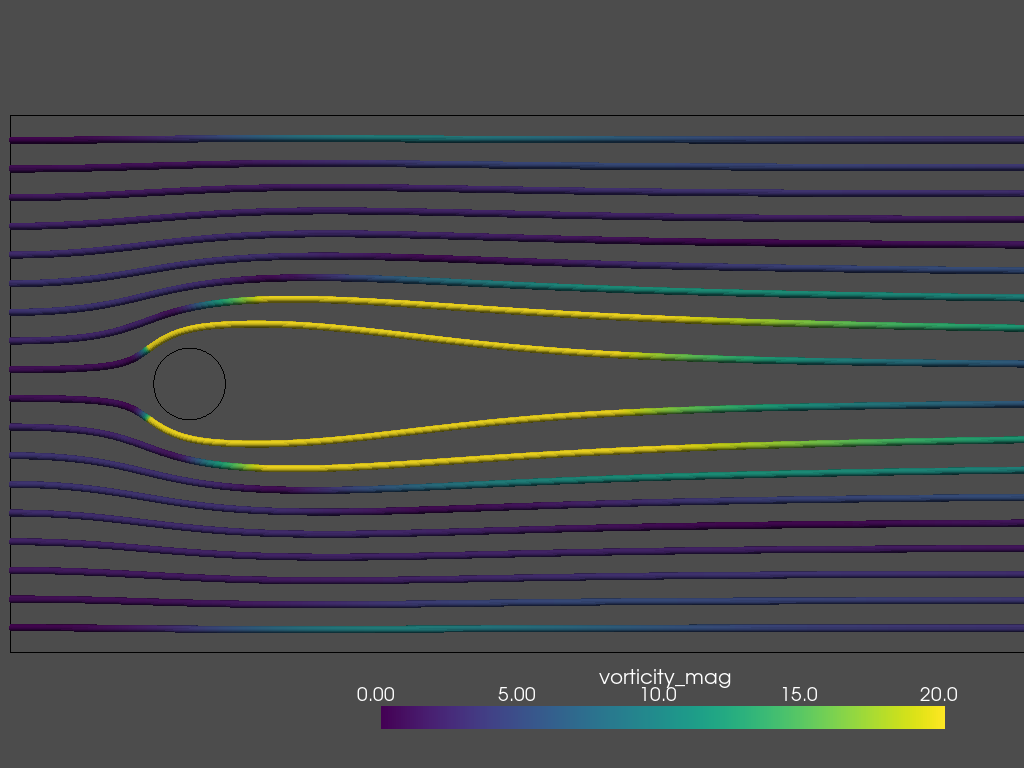

In [7]:
clim = [0, 20]
camera_position = [(7, 0, 20.0), (7, 0.0, 0.0), (0.0, 1.0, 0.0)]
line_streamlines = fluid_mesh.streamlines(
    pointa=(0, -5, 0),
    pointb=(0, 5, 0),
    n_points=25,
    max_time=100.0,
    compute_vorticity=False,  # vorticity already exists in dataset
)

p = pv.Plotter(off_screen=True)
for i in range(1, len(mesh)):
    p.add_mesh(mesh[i], color='k')
p.add_mesh(line_streamlines.tube(radius=0.05), scalars="vorticity_mag", clim=clim)
p.view_xy()
p.show(cpos=camera_position)

C:\Users\gabri\anaconda3\envs\py38\lib\site-packages\pyvista\plotting\plotting.py:6138: UserWarning: 
Set `jupyter_backend` backend to `"none"` to take a screenshot within a notebook environment.
  warnings.warn(


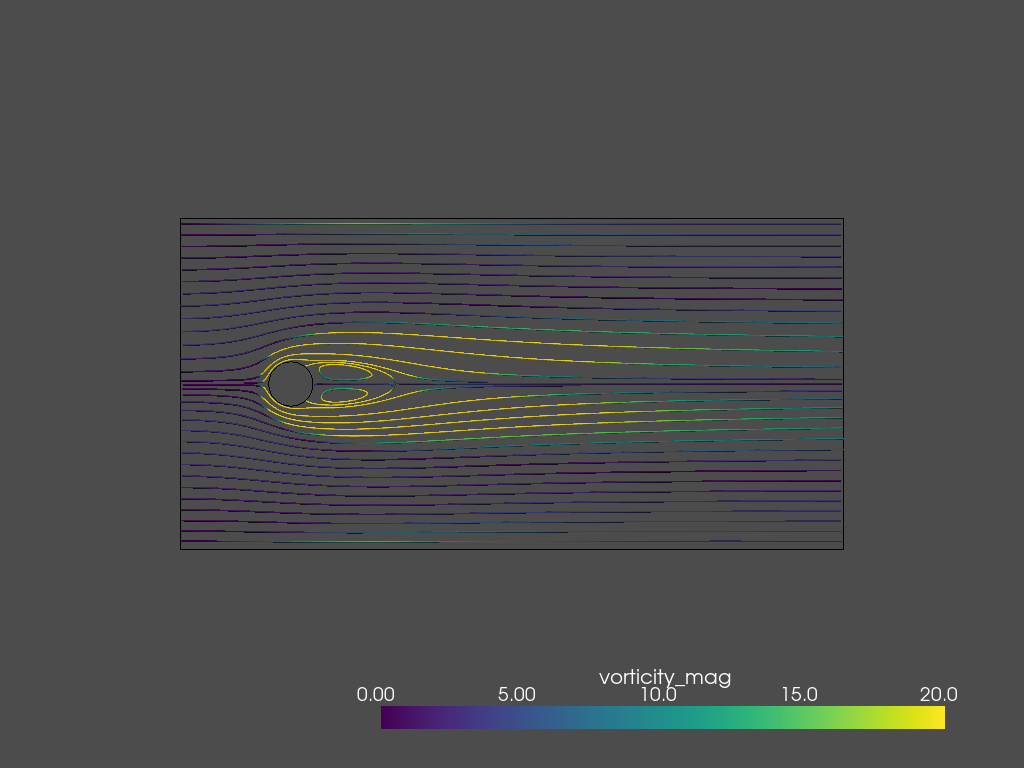

In [8]:
line_streamlines = fluid_mesh.streamlines_evenly_spaced_2D(
    start_position=(4, 0.1, 0.0),
    separating_distance=3,
    separating_distance_ratio=0.2,
    compute_vorticity=False,  # vorticity already exists in dataset
)

p = pv.Plotter(off_screen=True)

for i in range(1, len(mesh)):
    p.add_mesh(mesh[i], color='k')

p.add_mesh(line_streamlines.tube(radius=0.02), scalars="vorticity_mag", clim=clim, color='k')

p.view_xy()
# p.show(cpos=camera_position)
p.show(screenshot='streamlines.png')
# plt.show()


In [9]:
fluid_mesh

UnstructuredGrid (0x25f2ce014c0)
  N Cells:	14594
  N Points:	14831
  X Bounds:	0.000e+00, 1.500e+01
  Y Bounds:	-3.750e+00, 3.750e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	3

# Now, me!

In [10]:
# https://docs.pyvista.org/examples/02-plot/texture.html

In [11]:
# cv2.imshow("a",frame)

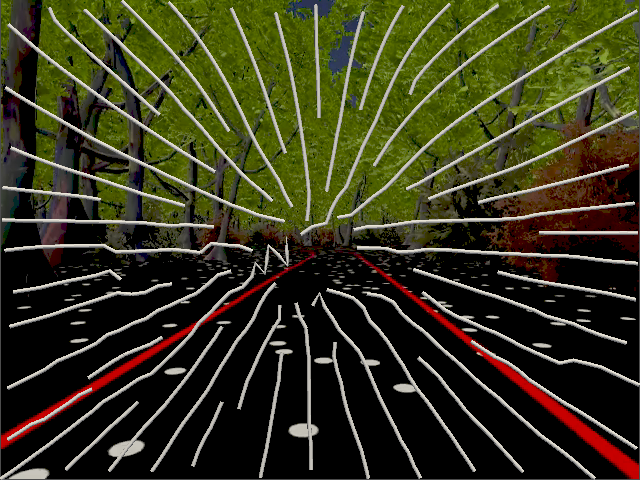

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import os
import sys
os.add_dll_directory("D://opencvgpu//opencv_build_310//bin")
os.add_dll_directory("C://Program Files//NVIDIA GPU Computing Toolkit//CUDA//v11.8//bin")
sys.path.append('core')

import cv2

# camera = pv.Camera()
# near_range = 0.3
# far_range = 0.8
# camera.clipping_range = (near_range, far_range)
# unit_vector = np.array(camera.direction) / np.linalg.norm(
#     np.array([camera.focal_point]) - np.array([camera.position])
# )

# frustum = camera.view_frustum(1.0)

# position = camera.position
# focal_point = camera.focal_point

fid = open("streamlines.pickle",'rb')
data = pickle.load(fid)

flow  = data['flow'] # a (480, 640, 2) vector field (optical flow)
frame = data['frame'] # a (480, 640, 3) image in bgr format
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # a (480, 640, 3) image in rgb format

w = int(np.shape(frame)[1])
h = int(np.shape(frame)[0])

x = np.arange(0, np.shape(frame)[0], 20)
y = np.arange(0, np.shape(frame)[1], 20)
xx, yy, zz = np.meshgrid(y, x, 0)

grid = pv.UniformGrid()
grid.dimensions = (w,h,1)
grid.origin = (0,0,0)
grid.spacing = (1,1,1)
grid.show_scalar_bar = False

grid.texture_map_to_plane(inplace=True)
# tex = pv.numpy_to_texture(cv2.rotate(frame, cv2.ROTATE_180))
tex = pv.numpy_to_texture(frame)

flow3D = np.zeros([np.shape(flow)[0]*np.shape(flow)[1],3],dtype=np.float32)
flow3D[:,0] = -flow[...,0].flatten()
flow3D[:,1] = -flow[...,1].flatten()

grid['vectors'] = flow3D
grid.set_active_vectors("vectors")

p = pv.Plotter(off_screen=True, window_size=[640, 480])
p.add_mesh(grid, texture=tex)

start_pts = np.array([[x,y,0] for x in np.arange(0, np.shape(frame)[0], 20) for y in np.arange(0, np.shape(frame)[1], 20) ])

line_streamlines = grid.streamlines_evenly_spaced_2D(
    start_position= (0,0,0),
    step_length = 10,
    separating_distance=20,
    separating_distance_ratio=.7,
    compute_vorticity=False,  # vorticity already exists in dataset
    vectors="vectors",
    
#     progress_bar= True,""
)

p.add_mesh(line_streamlines.tube(radius=2),color='w')

p.camera_position = 'xy'
p.view_xy()
# p.camera.focal_point = (0.2, 0.3, 0.3)
p.camera.up = (0.0, 1.0, 0.0)
p.camera.zoom(1.7)

p.show()

# p.render()
# p.save_graphic('out', title='PyVista Export', raster=True, painter=True)




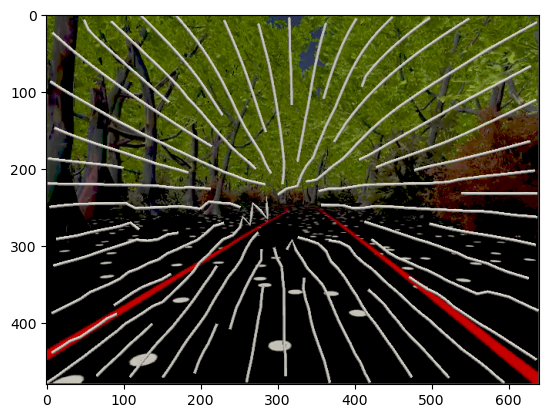

In [13]:
im = p.image
plt.imshow(im)

In [14]:
cv2.imshow('im', cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()